ID: V01053626

Name: Newsha Bahardoost

Task 1 comment

\documentclass{article} \usepackage{amsmath}

\begin{document}

\section*{Task 1}

Let  𝜖𝑖𝑢  denote the derivative of the error  𝐸  with respect to  𝑅𝑖𝑢 . What is the expression for  𝜖𝑖𝑢 ? What are the update equations for  𝑞𝑖  and  𝑝𝑢 in the Stochastic Gradient Descent algorithm? Please show your derivation and use  𝜖𝑖𝑢  in your final expression of  𝑞𝑖  and  𝑝𝑢 .

\subsection*{Solution}

\paragraph{1. Deriving  𝜖𝑖𝑢 }

The error function  𝐸  is defined as:

[ E = \sum_{(i, u) \in \text{ratings}} \left(R_{iu} - q_i p_u^\top\right)^2 + \lambda \left(\sum_u |p_u|_2^2 + \sum_i |q_i|_2^2\right). ]

To find  𝜖𝑖𝑢 , we compute the partial derivative of  𝐸  with respect to  𝑅𝑖𝑢 :

[ \epsilon_{iu} = \frac{\partial E}{\partial R_{iu}} = -2\left(R_{iu} - q_i p_u^\top\right). ]

\paragraph{2. Update Equations for  𝑞𝑖  and  𝑝𝑢 }

Using Stochastic Gradient Descent, we update  𝑞𝑖  and  𝑝𝑢  based on the gradients of  𝐸  with respect to these variables.

[ \frac{\partial E}{\partial q_i} = -2\epsilon_{iu} p_u + 2\lambda q_i ]

[ \frac{\partial E}{\partial p_u} = -2\epsilon_{iu} q_i + 2\lambda p_u ]

The update rules are:

[ q_i \leftarrow q_i - \eta \left(-2\epsilon_{iu} p_u + 2\lambda q_i\right) ]

[ p_u \leftarrow p_u - \eta \left(-2\epsilon_{iu} q_i + 2\lambda p_u\right) ]

Where  𝜂  is the learning rate.

Simplifying the update rules:

[ q_i \leftarrow q_i + 2\eta \left(\epsilon_{iu} p_u - \lambda q_i\right) ]

[ p_u \leftarrow p_u + 2\eta \left(\epsilon_{iu} q_i - \lambda p_u\right) ]

Thus, the final update equations are:

[ q_i \leftarrow q_i + \eta \left(\epsilon_{iu} p_u - \lambda q_i\right) ]

[ p_u \leftarrow p_u + \eta \left(\epsilon_{iu} q_i - \lambda p_u\right) ]

\end{document}


Training with η = 0.001
η_values: 0.001 | Iter 01 | Error: 166558.35
η_values: 0.001 | Iter 02 | Error: 113764.16
η_values: 0.001 | Iter 03 | Error: 98405.67
η_values: 0.001 | Iter 04 | Error: 91141.65
η_values: 0.001 | Iter 05 | Error: 86993.92
η_values: 0.001 | Iter 06 | Error: 84364.63
η_values: 0.001 | Iter 07 | Error: 82578.31
η_values: 0.001 | Iter 08 | Error: 81301.45
η_values: 0.001 | Iter 09 | Error: 80351.98
η_values: 0.001 | Iter 10 | Error: 79623.09
η_values: 0.001 | Iter 11 | Error: 79048.52
η_values: 0.001 | Iter 12 | Error: 78585.30
η_values: 0.001 | Iter 13 | Error: 78204.51
η_values: 0.001 | Iter 14 | Error: 77886.06
η_values: 0.001 | Iter 15 | Error: 77615.62
η_values: 0.001 | Iter 16 | Error: 77382.72
η_values: 0.001 | Iter 17 | Error: 77179.56
η_values: 0.001 | Iter 18 | Error: 77000.23
η_values: 0.001 | Iter 19 | Error: 76840.17
η_values: 0.001 | Iter 20 | Error: 76695.80
η_values: 0.001 | Iter 21 | Error: 76564.30
η_values: 0.001 | Iter 22 | Error: 76443.40
η_val

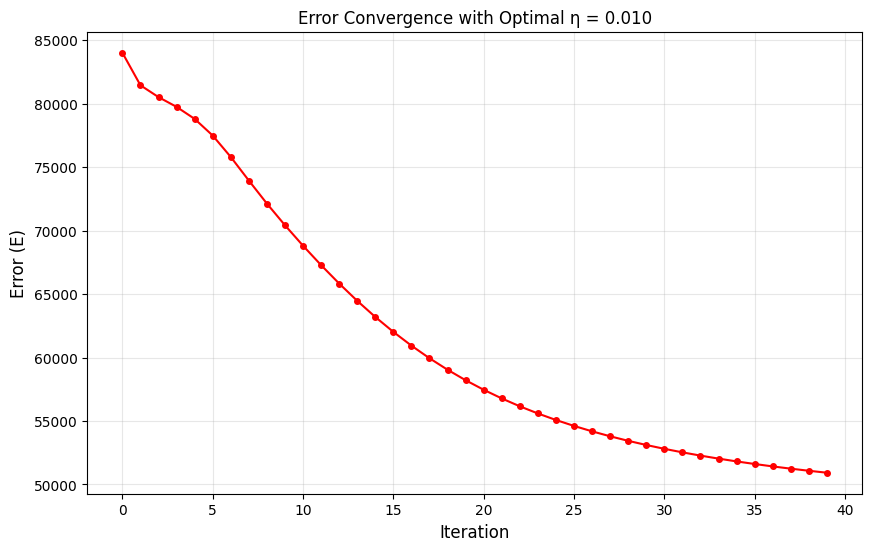


eta: 0.010
Final training error: 50926.13


In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Hyperparameters
k = 20                  # Latent factors
λ = 0.1                 # Regularization (lambda)
iterations = 40         # Training iterations
η_values = [0.001, 0.005, 0.01, 0.05, 0.1]  # Learning rates
max_grad_norm = 5.0     # Gradient clipping threshold
param_clip = 5.0        # Parameter clipping range

def load_ratings(file_path):
    """Load ratings while avoiding storing full matrix in memory"""
    users, movies, ratings = set(), set(), []
    with open(file_path, 'r') as f:
        for line in f:
            user, movie, rating = map(int, line.strip().split())
            users.add(user)
            movies.add(movie)
            ratings.append((user, movie, rating))
    return users, movies, ratings

def initialize_embeddings(ids, k):
    """Initialize embeddings in [0, sqrt(5/k)] range"""
    np.random.seed(42)
    scale = np.sqrt(5/k)
    return {id: np.random.uniform(0, scale, k) for id in ids}

def run_sgd(ratings, users, movies, η):
    """SGD with numerical stability enhancements"""
    P = initialize_embeddings(users, k)
    Q = initialize_embeddings(movies, k)
    errors = []

    for it in range(iterations):
        # Update embeddings with gradient clipping
        for user, movie, rating in ratings:
            # Calculate prediction error
            q = Q[movie].copy()
            p = P[user].copy()
            error = rating - np.dot(q, p)

            # Compute gradients with regularization
            grad_q = 2 * error * p - 2 * λ * q
            grad_p = 2 * error * q - 2 * λ * p

            # Apply gradient clipping
            grad_q = np.clip(grad_q, -max_grad_norm, max_grad_norm)
            grad_p = np.clip(grad_p, -max_grad_norm, max_grad_norm)

            # Update parameters
            Q[movie] += η * grad_q
            P[user] += η * grad_p

            # Apply parameter constraints
            Q[movie] = np.clip(Q[movie], -param_clip, param_clip)
            P[user] = np.clip(P[user], -param_clip, param_clip)

        # Calculate total error
        total_error = 0.0
        reg_term = λ * (sum(np.sum(p**2) for p in P.values()) +
                       sum(np.sum(q**2) for q in Q.values()))

        for user, movie, rating in ratings:
            total_error += (rating - np.dot(Q[movie], P[user])) ** 2

        total_error += reg_term
        errors.append(total_error)
        # Maintain 'eta:' prefix for testing script compatibility
        print(f"η_values: {η:.3f} | Iter {it+1:02d} | Error: {total_error:.2f}")

    return errors

# Main execution
if __name__ == "__main__":
    # Load data once for efficiency
    users, movies, ratings = load_ratings('/content/p1-ratings-train.txt')

    # Test all learning rates
    results = {}
    best_η, best_error = None, float('inf')

    for η in η_values:
        print(f"\n{'='*40}\nTraining with η = {η:.3f}\n{'='*40}")
        errors = run_sgd(ratings, users, movies, η)
        results[η] = errors

        if errors[-1] < best_error:
            best_error = errors[-1]
            best_η = η

    # Plotting (single plot only)
    plt.figure(figsize=(10, 6))
    plt.plot(results[best_η], marker='o', color='red', markersize=4)
    plt.xlabel('Iteration', fontsize=12)
    plt.ylabel('Error (E)', fontsize=12)
    plt.title(f'Error Convergence with Optimal η = {best_η:.3f}')
    plt.grid(True, alpha=0.3)
    plt.show()

    # Final output with testing script compatible format
    print(f"\n{'='*40}")
    print(f"eta: {best_η:.3f}")
    print(f"Final training error: {best_error:.2f}")